In [1]:
# Import relevant libraries, packages, and modules.

### YOUR CODE HERE ###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
epa_data = pd.read_csv("modified_c4_epa_air_quality.csv", index_col = 0)

In [3]:
epa_data.head(10)

,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
date_local,,,,,,,
2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759


In [4]:
epa_data.describe(include='all')

,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
count,260,260,260,257,260,260,260.000000
unique,52,149,190,253,1,1,NaN
top,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN
freq,66,14,21,2,260,260,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.766921
std,NaN,NaN,NaN,NaN,NaN,NaN,0.714716
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.098612
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.791759
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.302585


In [5]:
population_mean = epa_data['aqi_log'].mean()
population_mean

1.7669210929985582

Sample with replacement
First, name a new variable sampled_data. Then, use the sample() dataframe method to draw 50 samples from epa_data. Set replace equal to 'True' to specify sampling with replacement. For random_state, choose an arbitrary number for random seed. Make that arbitrary number 42.

In [6]:
sampled_data = epa_data.sample(n=50, replace=True, random_state=42)

In [7]:
sampled_data.head(10)

,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
date_local,,,,,,,
2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,1.098612
2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,3.295837
2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,1.098612
2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,2.397895
2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.693147
2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,1.098612
2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,1.098612
2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,1.791759
2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,1.791759


Compute the mean value from the aqi column
Compute the mean value from the aqi column in sampled_data and assign the value to the variable sample_mean.

In [8]:
sample_mean = sampled_data['aqi_log'].mean()
sample_mean

1.6379981384419398

Question: Why is sample_mean different from population_mean?

Due to sampling variability, the sample mean (sample_mean) is usually not the same as the population mean (population_mean). In this case, the sample mean is a point estimate of the population mean based on a random sample of 50 AQI values rather than the 260 AQI values from the original population in epa_data.

Apply the central limit theorem
Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the central limit theorem, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples.

Create an empty list and assign it to a variable called estimate_list.
Iterate through a for loop 10,000 times. To do this, make sure to utilize the range() function to generate a sequence of numbers from 0 to 9,999.
In each iteration of the loop, use the sample() function to take a random sample (with replacement) of 50 AQI values from the population. Do not set random_state to a value.
Use the list append() function to add the value of the sample mean to each item in the list.

In [10]:
estimate_list = []
for i in range(10000):
    estimate_list.append(epa_data['aqi_log'].sample(n=50,replace=True).mean())

In [11]:
estimate_df = pd.DataFrame(data={'estimate': estimate_list})
estimate_df

,estimate
0,1.759146
1,1.742148
2,1.550879
3,1.645130
4,1.829235
...,...
9995,1.697319
9996,1.844402
9997,1.799054
9998,1.917039


In [12]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

1.7682887050208562

<Axes: >

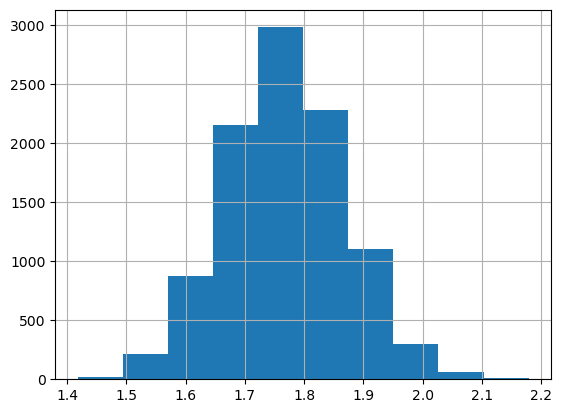

In [13]:
estimate_df['estimate'].hist()

In [17]:
standard_error = sampled_data['aqi_log'].std() / np.sqrt(len(sampled_data))
standard_error

0.0945235150131964

Visualize the relationship between the sampling and normal distributions
Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution. The following code overlays the density curve of the normal distribution described in the theorem on top of the histogram of the sampling distribution obtained by repeated sampling. The solid magenta line in the graph is the population mean, the blue dotted line is the mean of the 10,000 sample means, and the red dashed line is the mean of the first random sample of 50.

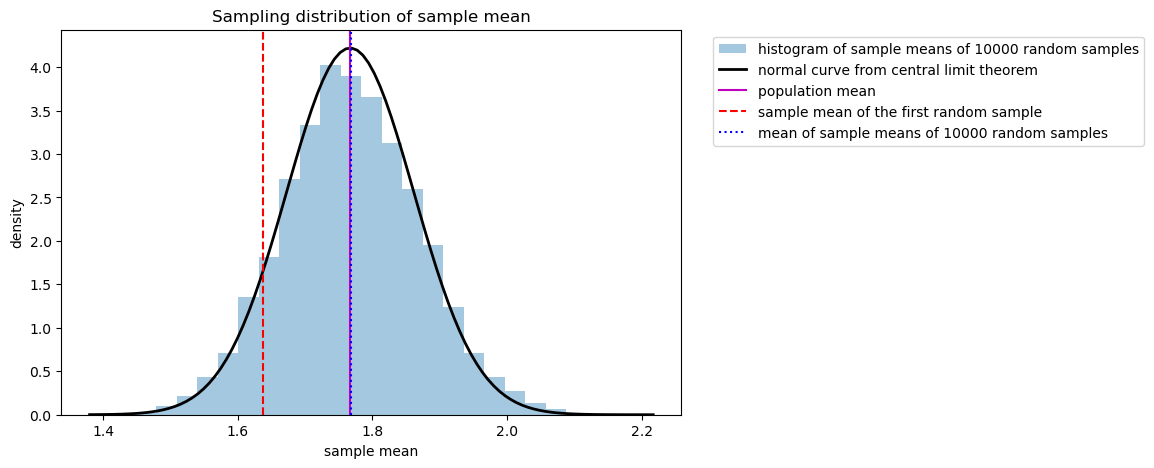

In [19]:
 # Generate a grid of 100 values from xmin to xmax.

 ### YOUE CODE HERE ###
plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, population_mean, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1));

Question: What insights did you gain from the preceding sampling distribution?

The histogram of the sampling distribution is well-approximated by the normal distribution described by the central limit theorem.
The estimate based on one particular sample (red dashed line) is off-center. This is expected due to sampling variability. The red dashed line would be in a different location if epa_data.sample(n=50, replace=True, random_state=42) had a different value for random_state.
The population mean (green solid line) and the mean of the sample means (blue dotted line) overlap, meaning that they are essentially equal to each other.
